# 라이브러리 불러오기

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'  #선명하게 만들기

In [2]:
# 결측치 확인하는 라이브러리
import missingno as msno 

# 다중대체 라이브러리
from fancyimpute import IterativeImputer

# Warning 메세지를 뜨지 않게 해줌
import warnings
warnings.filterwarnings('ignore')

(CVXPY) Aug 03 09:54:16 AM: Encountered unexpected exception importing solver CVXOPT:
ImportError('DLL load failed while importing base: 지정된 모듈을 찾을 수 없습니다.')
(CVXPY) Aug 03 09:54:16 AM: Encountered unexpected exception importing solver GLPK:
ImportError('DLL load failed while importing base: 지정된 모듈을 찾을 수 없습니다.')
(CVXPY) Aug 03 09:54:16 AM: Encountered unexpected exception importing solver GLPK_MI:
ImportError('DLL load failed while importing base: 지정된 모듈을 찾을 수 없습니다.')


In [3]:
# Window의 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 데이터 불러오기

In [4]:
# working directory 확인
os.getcwd() #현재 작업 위치 출력

'C:\\Users\\82105\\관세청\\code'

# 2019~2023 관세청 수출입 실적(품목별) data
- 수출 중량, 수입 중량 단위 : 톤(TON)
- 수출 금액, 수입 금액 단위 : 천 달러

In [5]:
#데이터 불러오기
trade = pd.read_excel('C:/Users/82105/관세청/data/추가 데이터셋 최종최종/수출입 실적(품목별)_2019-2023.xlsx', header=4) #header=4를 통해 수정
df1 = trade.copy()

In [6]:
df1.head()

,기간,HS코드,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
0,총계,NaN,NaN,"954,306,429.5","3,008,030,325","2,829,148,747.9","2,957,689,275","50,341,050"
1,2019,1.0,살아 있는 동물,37.7,"6,253","1,154.5","68,920","-62,667"
2,2019,2.0,육과 식용 설육(屑肉),"48,879.6","55,336","1,204,416.6","5,231,074","-5,175,738"
3,2019,3.0,어류ㆍ갑각류ㆍ연체동물과 그 밖의 수생(水生) 무척추동물,"487,150.1","1,515,640","1,302,561.2","4,705,258","-3,189,618"
4,2019,4.0,"낙농품, 새의 알, 천연꿀, 다른 류로 분류되지 않은 식용인 동물성 생산품","27,022.3","57,218","300,266.0","989,661","-932,443"


In [7]:
df1.tail()

,기간,HS코드,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
476,2023,94.0,"가구, 침구ㆍ매트리스ㆍ매트리스 서포트(mattress support)ㆍ쿠션과 이와 ...","190,506.6","1,363,987","771,144.0","3,624,313","-2,260,326"
477,2023,95.0,완구ㆍ게임용구ㆍ운동용구와 이들의 부분품과 부속품,"24,178.6","544,211","174,671.8","2,709,770","-2,165,558"
478,2023,96.0,잡품,"27,674.4","461,856","117,406.3","1,044,939","-583,083"
479,2023,97.0,예술품ㆍ수집품ㆍ골동품,205.0,"373,265","1,197.1","484,014","-110,749"
480,2023,99.0,일시적 입법 ; 설치된 간이 수정에 따른 입법을 트레이드한다 ; 추가적 수입제한농업...,0.0,0,"15,652.5",0,0


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기간      481 non-null    object 
 1   HS코드    480 non-null    float64
 2   품목명     480 non-null    object 
 3   수출 중량   481 non-null    object 
 4   수출 금액   481 non-null    object 
 5   수입 중량   481 non-null    object 
 6   수입 금액   481 non-null    object 
 7   무역수지    481 non-null    object 
dtypes: float64(1), object(7)
memory usage: 30.2+ KB


In [9]:
df1['HS코드'].unique()

array([nan,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 78.,
       79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90., 91.,
       92., 94., 95., 96., 97., 99.])

=> 77이 없음 : 찾아보니 77류는 '유보'여서, 아무 내용이 없음.

In [10]:
len(df1['HS코드'].unique())

97

=> 류의 개수는 97개

부를 기준으로 분류해본 다음, 의류가 포함된 부가 전체 수출입에서 차지하는 비율 산출해보기?

- 01부(살아 있는 동물과 동물성 생산품) : 1류~5류
- 02부(식물성 생산품) : 6류~14류
- 03부(동물성ㆍ식물성ㆍ미생물성 지방과 기름 및 이들의 분해생산물, 조제한 식용 지방과 동물성ㆍ식물성 왁스) : 15류
- 04부(조제 식료품, 음료ㆍ주류ㆍ식초, 담배ㆍ제조한 담배 대용물, 연소시키지 않고 흡입하도록 만들어진 물품(니코틴을 함유하였는지에 상관없다), 니코틴을 함유한 그 밖의 물품으로 인체 내에 니코틴을 흡수시키도록 만들어진 것) : 16류~24류
- 05부(광물성 생산품) : 25류~27류
- 06부(화학공업이나 연관공업의 생산품) : 28류~38류
- 07부(플라스틱과 그 제품, 고무와 그 제품) : 39류~40류
- 08부(원피ㆍ가죽ㆍ모피와 이들의 제품, 마구, 여행용구ㆍ핸드백과 이와 유사한 용기, 동물 거트(gut)[누에의 거트(gut)는 제외한다]의 제품) : 41류~43류
- 09부(목재와 그 제품, 목탄, 코르크와 그 제품, 짚ㆍ에스파르토(esparto)나 그 밖의 조물 재료의 제품, 바구니 세공물(basketware)과 지조세공물(枝條細工物)) : 44류~46류
- 10부(목재나 그 밖의 섬유질 셀룰로오스재료의 펄프, 회수한 종이ㆍ판지[웨이스트(waste)와 스크랩(scrap)], 종이ㆍ판지와 이들의 제품) : 47류~49류
- 11부(방직용 섬유와 방직용 섬유의 제품) : 50류~63류
- 12부(신발류ㆍ모자류ㆍ산류(傘類)ㆍ지팡이ㆍ시트스틱(seat-stick)ㆍ채찍ㆍ승마용 채찍과 이들의 부분품, 조제 깃털과 그 제품, 조화, 사람 머리카락으로 된 제품) : 64류~67류
- 13부(돌ㆍ플라스터(plaster)ㆍ시멘트ㆍ석면ㆍ운모나 이와 유사한 재료의 제품, 도자제품, 유리와 유리제품) : 68류~70류
- 14부(천연진주ㆍ양식진주ㆍ귀석ㆍ반귀석ㆍ귀금속ㆍ귀금속을 입힌 금속과 이들의 제품, 모조 신변장식용품, 주화) : 71류
- 15부(비금속(卑金屬)과 그 제품) : 72류~83류
- 16부(기계류ㆍ전기기기와 이들의 부분품, 녹음기ㆍ음성재생기ㆍ텔레비전의 영상과 음향의 기록기ㆍ재생기와 이들의 부분품ㆍ부속품) : 84류~85류
- 17부(차량ㆍ항공기ㆍ선박과 수송기기 관련품) : 86류~89류
- 18부(광학기기ㆍ사진용 기기ㆍ영화용 기기ㆍ측정기기ㆍ검사기기ㆍ정밀기기ㆍ의료용 기기, 시계, 악기, 이들의 부분품과 부속품) : 90류~92류
- 19부(무기ㆍ총포탄과 이들의 부분품과 부속품) : 93류~94류
- 20부(잡품) : 94류~96류
- 21부(예술품ㆍ수집품ㆍ골동품) : 97류

11부가 차지하는 비중 확인하기

In [11]:
def map_hs_code_to_bu(hs_code):
    if 1 <= hs_code <= 5:
        return '1부'
    elif 6 <= hs_code <= 14:
        return '2부'
    elif hs_code == 15:
        return '3부'
    elif 16 <= hs_code <= 24:
        return '4부'
    elif 25 <= hs_code <= 27:
        return '5부'
    elif 28 <= hs_code <= 38:
        return '6부'
    elif 39 <= hs_code <= 40:
        return '7부'
    elif 41 <= hs_code <= 43:
        return '8부'
    elif 44 <= hs_code <= 46:
        return '9부'
    elif 47 <= hs_code <= 49:
        return '10부'
    elif 50 <= hs_code <= 63:
        return '11부'
    elif 64 <= hs_code <= 67:
        return '12부'
    elif 68 <= hs_code <= 70:
        return '13부'
    elif hs_code == 71:
        return '14부'
    elif 72 <= hs_code <= 83:
        return '15부'
    elif 84 <= hs_code <= 85:
        return '16부'
    elif 86 <= hs_code <= 89:
        return '17부'
    elif 90 <= hs_code <= 92:
        return '18부'
    elif 93 <= hs_code <= 94:
        return '19부'
    elif 94 <= hs_code <= 96:
        return '20부'
    elif hs_code == 97:
        return '21부'
    else:
        return '기타'

In [12]:
df1['부'] = df1['HS코드'].apply(lambda x: map_hs_code_to_bu(int(x)) if pd.notnull(x) else '기타')

In [13]:
df1[['HS코드','부']].tail(10)

,HS코드,부
471,88.0,17부
472,89.0,17부
473,90.0,18부
474,91.0,18부
475,92.0,18부
476,94.0,19부
477,95.0,20부
478,96.0,20부
479,97.0,21부
480,99.0,기타


In [14]:
df1.tail(1)

,기간,HS코드,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지,부
480,2023,99.0,일시적 입법 ; 설치된 간이 수정에 따른 입법을 트레이드한다 ; 추가적 수입제한농업...,0.0,0,"15,652.5",0,0,기타


=> HS코드가 99류인 경우는 없어서 해당 행을 제거하고 전체 수출입에서도 해당 값을 빼야함

In [15]:
df1[df1['부'] == '기타']

,기간,HS코드,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지,부
0,총계,NaN,NaN,"954,306,429.5","3,008,030,325","2,829,148,747.9","2,957,689,275","50,341,050",기타
96,2019,99.0,일시적 입법 ; 설치된 간이 수정에 따른 입법을 트레이드한다 ; 추가적 수입제한농업...,0.0,0,"19,618.2",21,-21,기타
192,2020,99.0,일시적 입법 ; 설치된 간이 수정에 따른 입법을 트레이드한다 ; 추가적 수입제한농업...,0.0,0,"21,029.1",13,-13,기타
288,2021,99.0,일시적 입법 ; 설치된 간이 수정에 따른 입법을 트레이드한다 ; 추가적 수입제한농업...,0.0,0,"18,182.6",3,-3,기타
384,2022,99.0,일시적 입법 ; 설치된 간이 수정에 따른 입법을 트레이드한다 ; 추가적 수입제한농업...,0.0,0,"16,205.5",0,0,기타
480,2023,99.0,일시적 입법 ; 설치된 간이 수정에 따른 입법을 트레이드한다 ; 추가적 수입제한농업...,0.0,0,"15,652.5",0,0,기타


In [16]:
df1 = df1.drop(index=[0, 96, 192, 288, 384, 480])
display(df1.head())
display(df1.tail())

,기간,HS코드,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지,부
1,2019,1.0,살아 있는 동물,37.7,"6,253","1,154.5","68,920","-62,667",1부
2,2019,2.0,육과 식용 설육(屑肉),"48,879.6","55,336","1,204,416.6","5,231,074","-5,175,738",1부
3,2019,3.0,어류ㆍ갑각류ㆍ연체동물과 그 밖의 수생(水生) 무척추동물,"487,150.1","1,515,640","1,302,561.2","4,705,258","-3,189,618",1부
4,2019,4.0,"낙농품, 새의 알, 천연꿀, 다른 류로 분류되지 않은 식용인 동물성 생산품","27,022.3","57,218","300,266.0","989,661","-932,443",1부
5,2019,5.0,다른 류로 분류되지 않은 동물성 생산품,"43,985.2","95,839","64,607.3","316,656","-220,817",1부


,기간,HS코드,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지,부
475,2023,92.0,악기와 그 부분품과 부속품,"11,067.8","113,101","8,961.9","213,955","-100,854",18부
476,2023,94.0,"가구, 침구ㆍ매트리스ㆍ매트리스 서포트(mattress support)ㆍ쿠션과 이와 ...","190,506.6","1,363,987","771,144.0","3,624,313","-2,260,326",19부
477,2023,95.0,완구ㆍ게임용구ㆍ운동용구와 이들의 부분품과 부속품,"24,178.6","544,211","174,671.8","2,709,770","-2,165,558",20부
478,2023,96.0,잡품,"27,674.4","461,856","117,406.3","1,044,939","-583,083",20부
479,2023,97.0,예술품ㆍ수집품ㆍ골동품,205.0,"373,265","1,197.1","484,014","-110,749",21부


In [17]:
df1['부'].unique()

array(['1부', '2부', '3부', '4부', '5부', '6부', '7부', '8부', '9부', '10부', '11부',
       '12부', '13부', '14부', '15부', '16부', '17부', '18부', '19부', '20부',
       '21부'], dtype=object)

=> 1부부터 21부까지 모두 있는 것을 알 수 있음.

'부'를 기준으로 수입 중량과 수입 금액 비율 계산하기

In [18]:
# '수입 중량' 및 '수입 금액' 열의 데이터를 쉼표 제거 후 숫자 형식으로 변환
df1['수입 중량'] = df1['수입 중량'].str.replace(',', '').astype(float)
df1['수입 금액'] = df1['수입 금액'].str.replace(',', '').astype(float)

In [19]:
df1

,기간,HS코드,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지,부
1,2019,1.0,살아 있는 동물,37.7,"6,253",1154.5,68920.0,"-62,667",1부
2,2019,2.0,육과 식용 설육(屑肉),"48,879.6","55,336",1204416.6,5231074.0,"-5,175,738",1부
3,2019,3.0,어류ㆍ갑각류ㆍ연체동물과 그 밖의 수생(水生) 무척추동물,"487,150.1","1,515,640",1302561.2,4705258.0,"-3,189,618",1부
4,2019,4.0,"낙농품, 새의 알, 천연꿀, 다른 류로 분류되지 않은 식용인 동물성 생산품","27,022.3","57,218",300266.0,989661.0,"-932,443",1부
5,2019,5.0,다른 류로 분류되지 않은 동물성 생산품,"43,985.2","95,839",64607.3,316656.0,"-220,817",1부
...,...,...,...,...,...,...,...,...,...
475,2023,92.0,악기와 그 부분품과 부속품,"11,067.8","113,101",8961.9,213955.0,"-100,854",18부
476,2023,94.0,"가구, 침구ㆍ매트리스ㆍ매트리스 서포트(mattress support)ㆍ쿠션과 이와 ...","190,506.6","1,363,987",771144.0,3624313.0,"-2,260,326",19부
477,2023,95.0,완구ㆍ게임용구ㆍ운동용구와 이들의 부분품과 부속품,"24,178.6","544,211",174671.8,2709770.0,"-2,165,558",20부
478,2023,96.0,잡품,"27,674.4","461,856",117406.3,1044939.0,"-583,083",20부


In [20]:
# 전체 수입 중량과 수입 금액을 계산
total_import_weight = df1['수입 중량'].sum()
total_import_amount = df1['수입 금액'].sum()

In [24]:
total_import_amount

2957689230.0

In [21]:
# '부'별로 수입 중량과 수입 금액의 합계를 계산합니다
grouped = df1.groupby('부').agg({'수입 중량': 'sum', '수입 금액': 'sum'}).reset_index()

In [22]:
# 각 '부'의 수입 중량 및 수입 금액 비율을 계산합니다
grouped['수입 중량 비율 (%)'] = (grouped['수입 중량'] / total_import_weight) * 100
grouped['수입 금액 비율 (%)'] = (grouped['수입 금액'] / total_import_amount) * 100

In [23]:
grouped

,부,수입 중량,수입 금액,수입 중량 비율 (%),수입 금액 비율 (%)
0,10부,2.326610e+07,20347460.0,0.822397,0.687951
1,11부,1.048134e+07,84735492.0,0.370489,2.864922
2,12부,8.335451e+05,20156152.0,0.029464,0.681483
3,13부,3.111833e+07,28798095.0,1.099954,0.973669
4,14부,2.628265e+05,29944003.0,0.009290,1.012412
5,15부,1.351068e+08,216277018.0,4.775680,7.312365
6,16부,2.157567e+07,859446973.0,0.762645,29.058055
7,17부,1.819026e+07,125199878.0,0.642979,4.233030
8,18부,1.072422e+06,110981340.0,0.037907,3.752299
9,19부,4.103947e+06,18887449.0,0.145064,0.638588


In [27]:
grouped = grouped.sort_values(by='수입 금액 비율 (%)', ascending=False)

In [28]:
grouped

,부,수입 중량,수입 금액,수입 중량 비율 (%),수입 금액 비율 (%)
6,16부,2.157567e+07,859446973.0,0.762645,29.058055
16,5부,2.219888e+09,843444495.0,78.467406,28.517009
17,6부,9.046856e+07,271081544.0,3.197833,9.165315
5,15부,1.351068e+08,216277018.0,4.775680,7.312365
7,17부,1.819026e+07,125199878.0,0.642979,4.233030
8,18부,1.072422e+06,110981340.0,0.037907,3.752299
1,11부,1.048134e+07,84735492.0,0.370489,2.864922
18,7부,1.958855e+07,78424285.0,0.692405,2.651539
10,1부,1.478509e+07,63791572.0,0.522615,2.156804
15,4부,6.360097e+07,61333997.0,2.248132,2.073713


# 시각화

In [30]:
# '수입 금액 비율(%)' 기준으로 상위 10개 필터링
top_10 = grouped.nlargest(10, '수입 금액 비율 (%)')

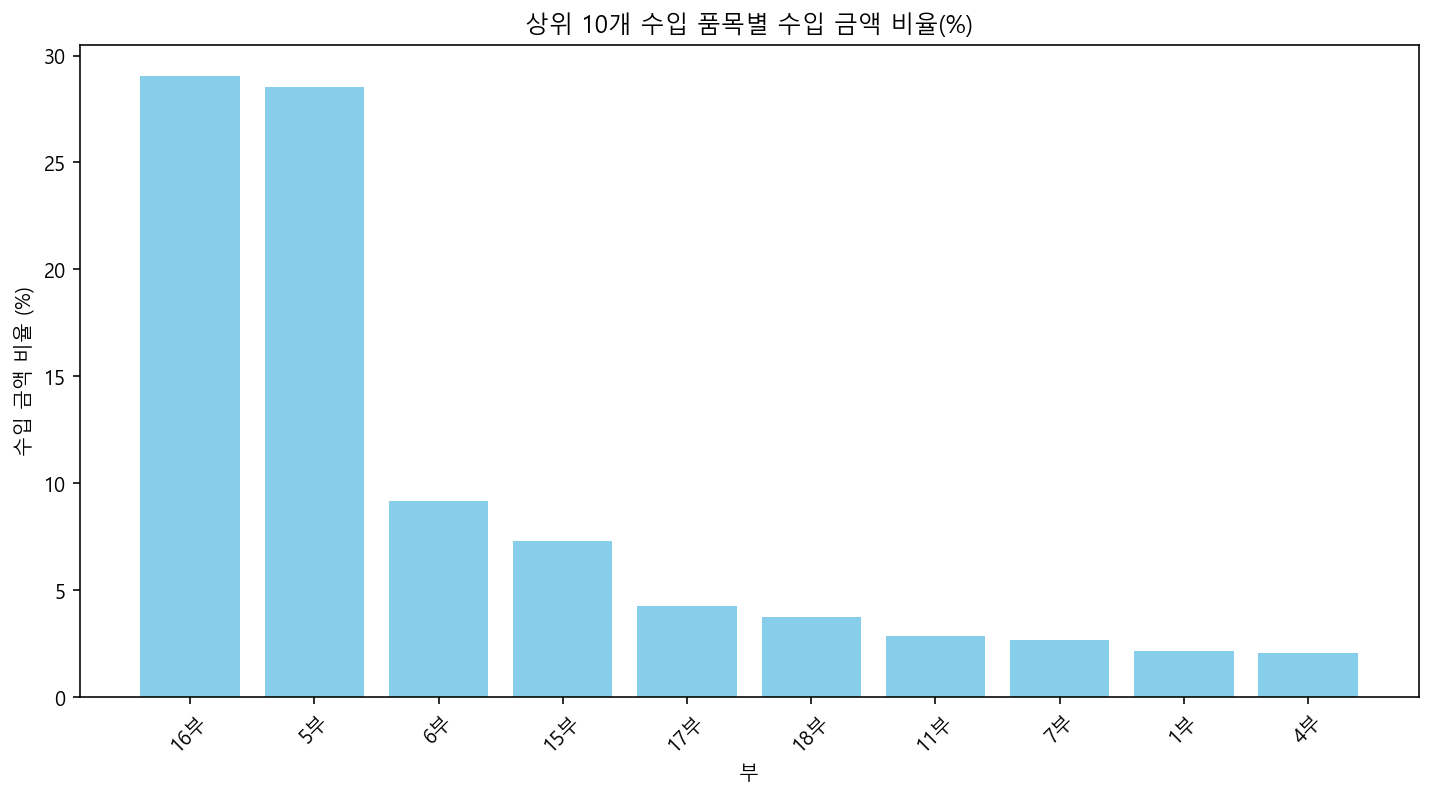

In [32]:
# 막대 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(top_10['부'], top_10['수입 금액 비율 (%)'], color='skyblue')
plt.xlabel('부')
plt.ylabel('수입 금액 비율 (%)')
plt.title('상위 10개 수입 품목별 수입 금액 비율(%)')
plt.xticks(rotation=45)
plt.show()

In [34]:
# 7번째 값부터 16번째 값까지 선택
subset = grouped.iloc[6:16]

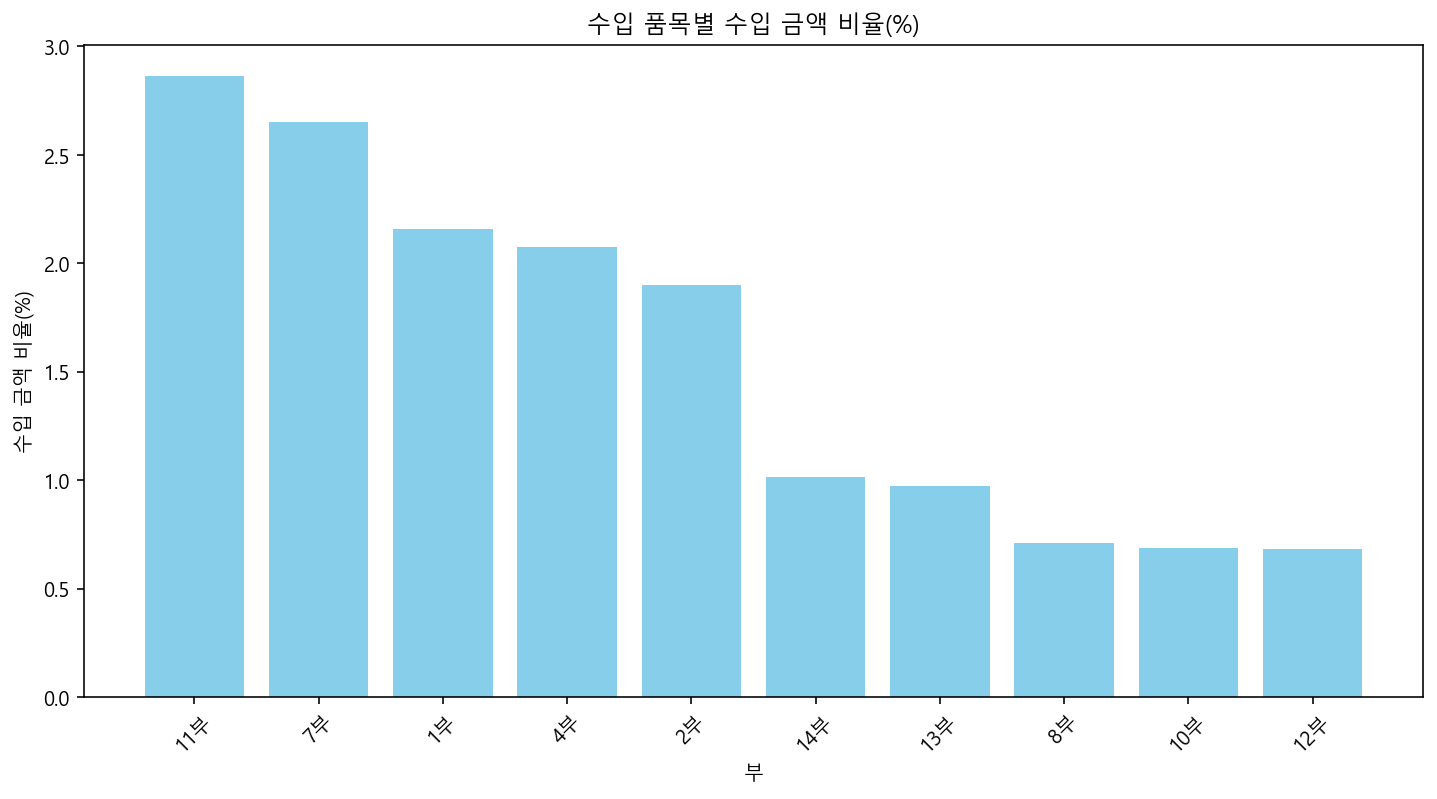

In [36]:
# 막대 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(subset['부'], subset['수입 금액 비율 (%)'], color='skyblue')
plt.xlabel('부')
plt.ylabel('수입 금액 비율(%)')
plt.title('수입 품목별 수입 금액 비율(%)')
plt.xticks(rotation=45)
plt.show()